In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 time dumps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 869ms/step - accuracy: 0.2315 - loss: 3.2087 - val_accuracy: 0.1875 - val_loss: 2.7334
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.2795 - loss: 2.9008 - val_accuracy: 0.2083 - val_loss: 2.7315
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.3298 - loss: 2.6392 - val_accuracy: 0.2500 - val_loss: 2.5342
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.4191 - loss: 2.2918 - val_accuracy: 0.2708 - val_loss: 2.5733
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.4719 - loss: 2.1611 - val_accuracy: 0.2500 - val_loss: 2.6555
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.5506 - loss: 1.9862 - val_accuracy: 0.2917 - val_loss: 2.6273
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.6094 - loss: 1.8273 - val_accuracy: 0.3125 - val_loss: 2.5896
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.6603 - loss: 1.6808 - val_accuracy: 0.3125 - val_loss: 2.5909
Epo

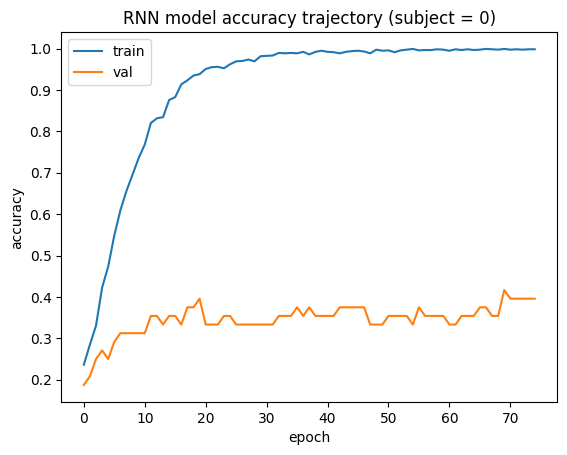

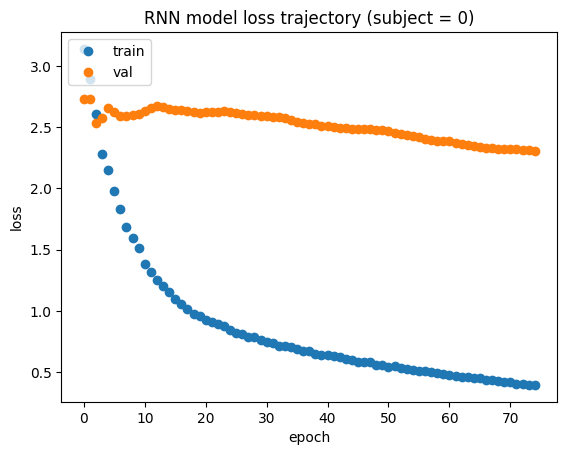

Test accuracy of the RNN model: 0.4399999976158142


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_9 (GRU)                     │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 511ms/step - accuracy: 0.2790 - loss: 2.7835 - val_accuracy: 0.3522 - val_loss: 2.2273
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.4145 - loss: 2.2357 - val_accuracy: 0.4066 - val_loss: 2.0460
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.4908 - loss: 1.9206 - val_accuracy: 0.4444 - val_loss: 1.9135
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.5562 - loss: 1.6985 - val_accuracy: 0.4752 - val_loss: 1.8280
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 341ms/step - accuracy: 0.6176 - loss: 1.4936 - val_accuracy: 0.4846 - val_loss: 1.7585
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.6665 - loss: 1.3617 - val_accuracy: 0.5106 - val_loss: 1.7086
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.6989 - loss: 1.2443 - val_accuracy: 0.4917 - val_loss: 1.6580
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.7199 - loss: 1.1529 - val_accuracy: 0.5012 - va

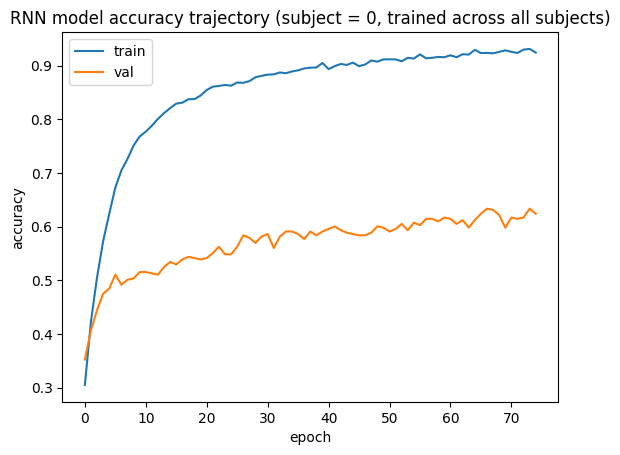

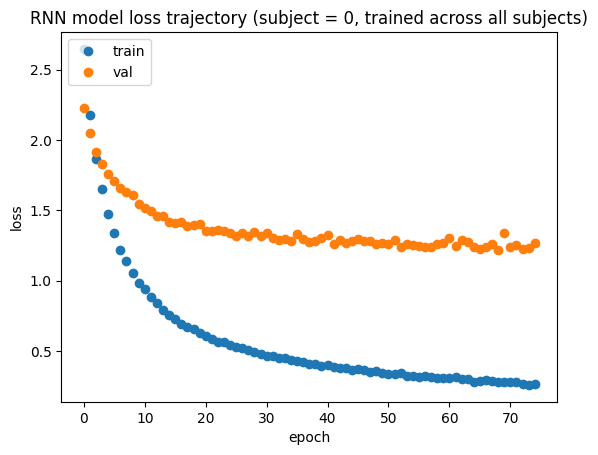

Test accuracy of the RNN model: 0.5600000023841858


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2429 - loss: 2.9736 - val_accuracy: 0.3125 - val_loss: 2.6192
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.3259 - loss: 2.6803 - val_accuracy: 0.3958 - val_loss: 2.3921
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.3785 - loss: 2.4281 - val_accuracy: 0.3958 - val_loss: 2.2855
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4340 - loss: 2.2421 - val_accuracy: 0.3958 - val_loss: 2.2382
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.4810 - loss: 2.1042 - val_accuracy: 0.3125 - val_loss: 2.2242
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.5601 - loss: 1.9525 - val_accuracy: 0.3542 - val_loss: 2.2178
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6040 - loss: 1.8078 - val_accuracy: 0.4583 - val_loss: 2.1760
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.6276 - loss: 1.7377 - val_accuracy: 0.4167 - val_loss: 2.1163
Epoch 

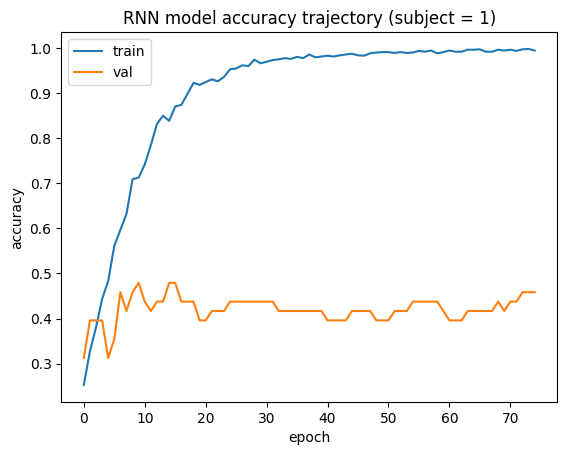

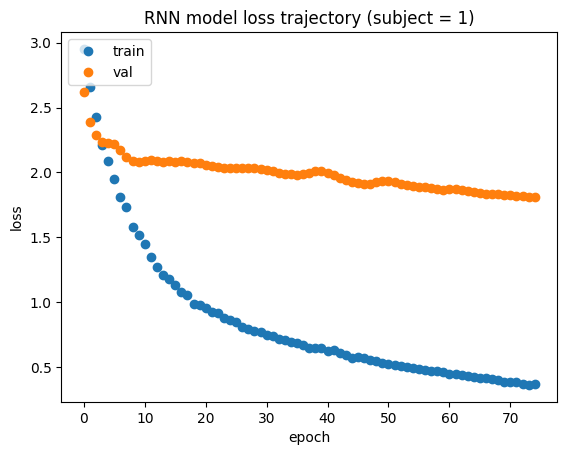

Test accuracy of the RNN model: 0.4399999976158142


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_11 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.2888 - loss: 2.8651 - val_accuracy: 0.3381 - val_loss: 2.2949
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 412ms/step - accuracy: 0.4045 - loss: 2.3149 - val_accuracy: 0.3664 - val_loss: 2.1885
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.4525 - loss: 2.0451 - val_accuracy: 0.4232 - val_loss: 2.0178
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.5350 - loss: 1.7954 - val_accuracy: 0.4421 - val_loss: 1.9127
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.5745 - loss: 1.6434 - val_accuracy: 0.4634 - val_loss: 1.7924
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.6216 - loss: 1.4678 - val_accuracy: 0.4799 - val_loss: 1.7011
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.6632 - loss: 1.3348 - val_accuracy: 0.4823 - val_loss: 1.6200
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 0.6836 - loss: 1.2479 - val_accuracy: 0.4728 - va

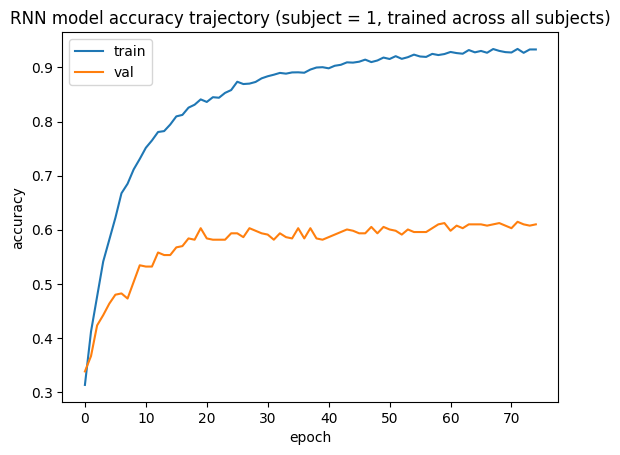

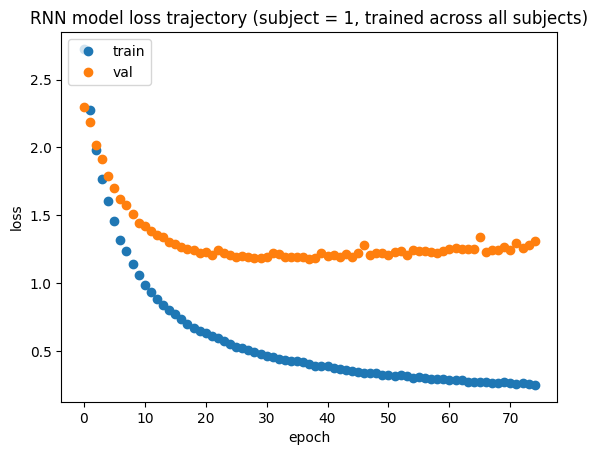

Test accuracy of the RNN model: 0.6399999856948853


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2751 - loss: 3.0291 - val_accuracy: 0.2708 - val_loss: 2.9479
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.3249 - loss: 2.7533 - val_accuracy: 0.2917 - val_loss: 2.7401
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.3490 - loss: 2.6407 - val_accuracy: 0.2917 - val_loss: 2.4622
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.3654 - loss: 2.4446 - val_accuracy: 0.3333 - val_loss: 2.4954
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.4011 - loss: 2.3355 - val_accuracy: 0.3958 - val_loss: 2.5219
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.4655 - loss: 2.1736 - val_accuracy: 0.3542 - val_loss: 2.3864
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 0.4845 - loss: 2.0978 - val_accuracy: 0.3333 - val_loss: 2.2978
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.5479 - loss: 1.9601 - val_accuracy: 0.3750 - val_loss: 2.2706
Epoch 

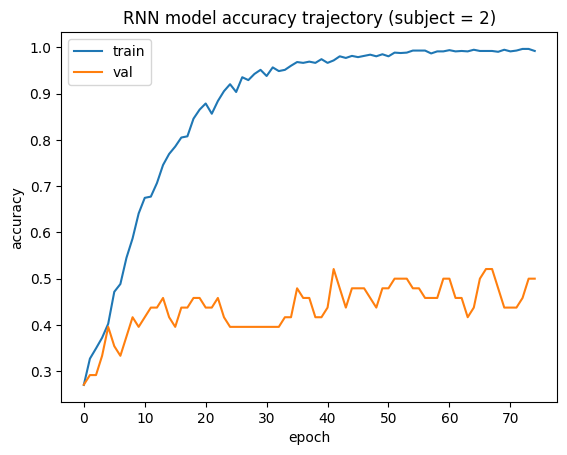

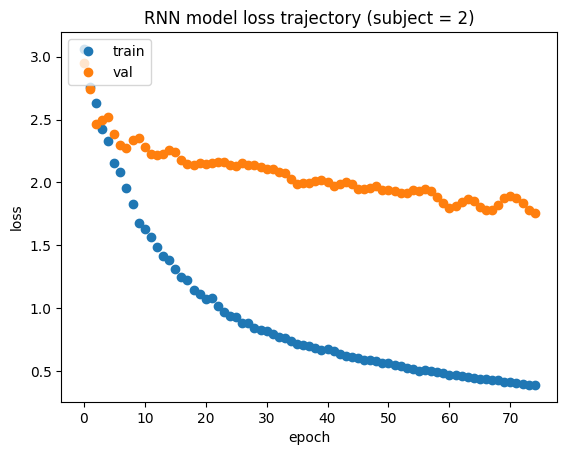

Test accuracy of the RNN model: 0.6200000047683716


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.2751 - loss: 2.8493 - val_accuracy: 0.3404 - val_loss: 2.2659
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.4125 - loss: 2.2588 - val_accuracy: 0.3972 - val_loss: 2.1202
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.5086 - loss: 1.9171 - val_accuracy: 0.4468 - val_loss: 1.9830
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.5472 - loss: 1.7349 - val_accuracy: 0.4610 - val_loss: 1.8740
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.6193 - loss: 1.5293 - val_accuracy: 0.4610 - val_loss: 1.8070
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.6445 - loss: 1.4059 - val_accuracy: 0.4846 - val_loss: 1.7407
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.6818 - loss: 1.2773 - val_accuracy: 0.4823 - val_loss: 1.6942
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.7114 - loss: 1.1919 - val_accuracy: 0.4941 - val

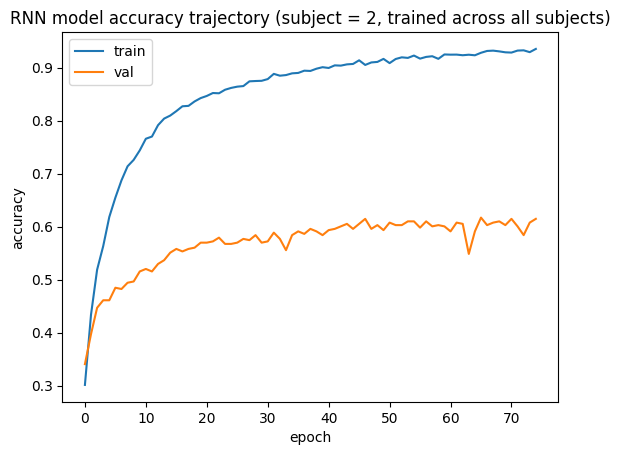

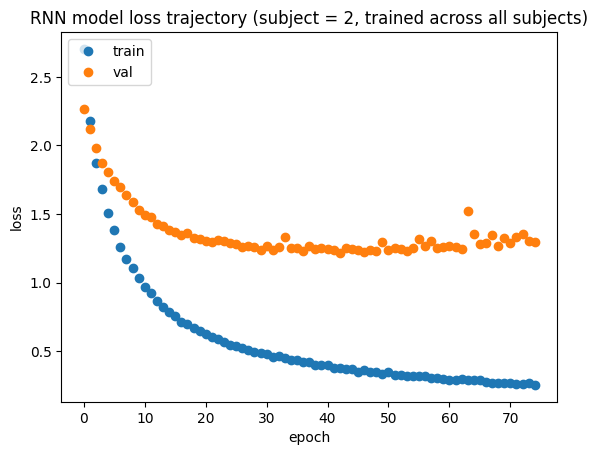

Test accuracy of the RNN model: 0.6600000262260437


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2473 - loss: 3.1395 - val_accuracy: 0.2128 - val_loss: 2.6862
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.2698 - loss: 2.8374 - val_accuracy: 0.2553 - val_loss: 2.5867
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.3252 - loss: 2.5843 - val_accuracy: 0.2340 - val_loss: 2.7185
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.3933 - loss: 2.3954 - val_accuracy: 0.2766 - val_loss: 2.6725
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.4755 - loss: 2.1498 - val_accuracy: 0.2979 - val_loss: 2.4504
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.4955 - loss: 2.0717 - val_accuracy: 0.3191 - val_loss: 2.3533
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.5120 - loss: 1.9108 - val_accuracy: 0.3404 - val_loss: 2.3363
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.6002 - loss: 1.7930 - val_accuracy: 0.3617 - val_loss: 2.3525
Epoch 

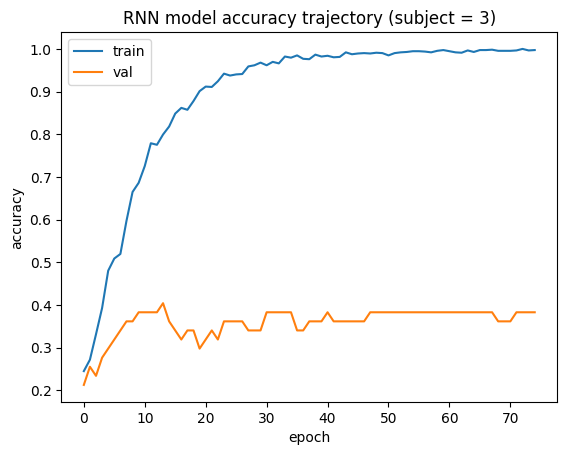

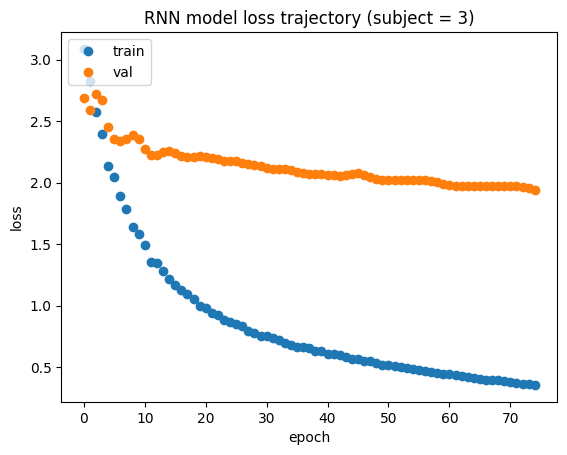

Test accuracy of the RNN model: 0.41999998688697815


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 501ms/step - accuracy: 0.2809 - loss: 2.8958 - val_accuracy: 0.3357 - val_loss: 2.3679
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.4033 - loss: 2.3513 - val_accuracy: 0.3570 - val_loss: 2.2076
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 454ms/step - accuracy: 0.4805 - loss: 2.0306 - val_accuracy: 0.3877 - val_loss: 2.0900
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.5292 - loss: 1.8230 - val_accuracy: 0.4208 - val_loss: 1.9364
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.5933 - loss: 1.6077 - val_accuracy: 0.4634 - val_loss: 1.8653
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - accuracy: 0.6275 - loss: 1.4709 - val_accuracy: 0.4610 - val_loss: 1.7883
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 366ms/step - accuracy: 0.6581 - loss: 1.3593 - val_accuracy: 0.4610 - val_loss: 1.7071
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.6900 - loss: 1.2452 - val_accuracy: 0.4823 - va

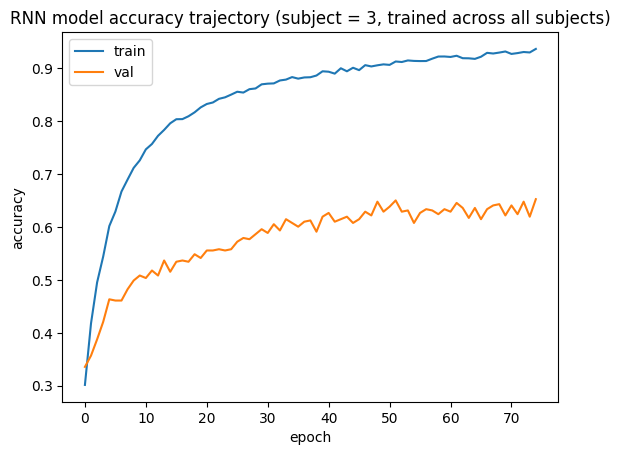

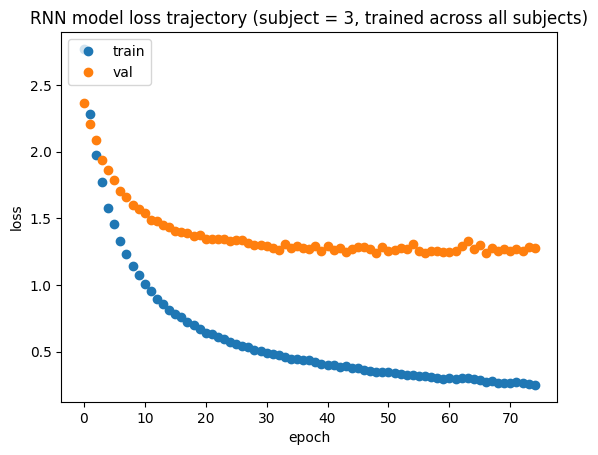

Test accuracy of the RNN model: 0.6200000047683716


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.2741 - loss: 2.8729 - val_accuracy: 0.4043 - val_loss: 2.3369
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.3255 - loss: 2.5838 - val_accuracy: 0.4468 - val_loss: 2.2489
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4287 - loss: 2.2866 - val_accuracy: 0.3404 - val_loss: 2.2790
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5041 - loss: 2.0622 - val_accuracy: 0.4255 - val_loss: 2.2310
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5815 - loss: 1.8966 - val_accuracy: 0.4681 - val_loss: 2.1412
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6623 - loss: 1.7256 - val_accuracy: 0.4681 - val_loss: 2.0927
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7207 - loss: 1.5690 - val_accuracy: 0.4894 - val_loss: 2.0668
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.7704 - loss: 1.4398 - val_accuracy: 0.4894 - val_loss: 2.0501
Epo

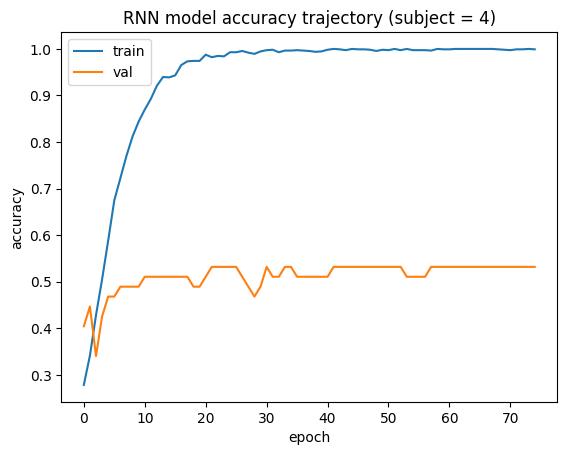

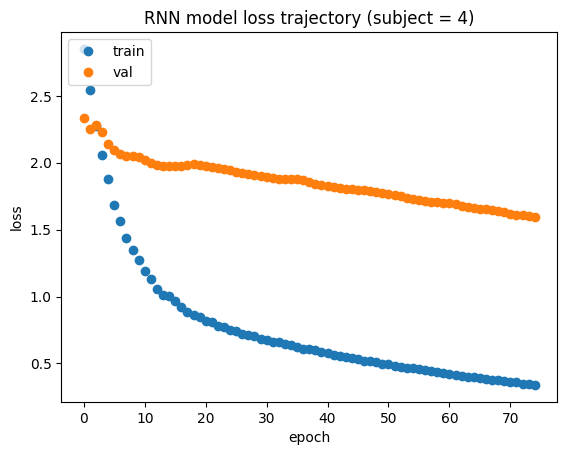

Test accuracy of the RNN model: 0.44680851697921753


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.2937 - loss: 2.8332 - val_accuracy: 0.3239 - val_loss: 2.3232
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.3899 - loss: 2.3237 - val_accuracy: 0.3452 - val_loss: 2.1702
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.4733 - loss: 2.0095 - val_accuracy: 0.4019 - val_loss: 2.0288
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.5393 - loss: 1.7683 - val_accuracy: 0.4232 - val_loss: 1.9174
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.5855 - loss: 1.5895 - val_accuracy: 0.4492 - val_loss: 1.8295
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.6140 - loss: 1.4544 - val_accuracy: 0.4444 - val_loss: 1.7479
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 427ms/step - accuracy: 0.6643 - loss: 1.3098 - val_accuracy: 0.4610 - val_loss: 1.7009
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.6837 - loss: 1.2132 - val_accuracy: 0.4823 - va

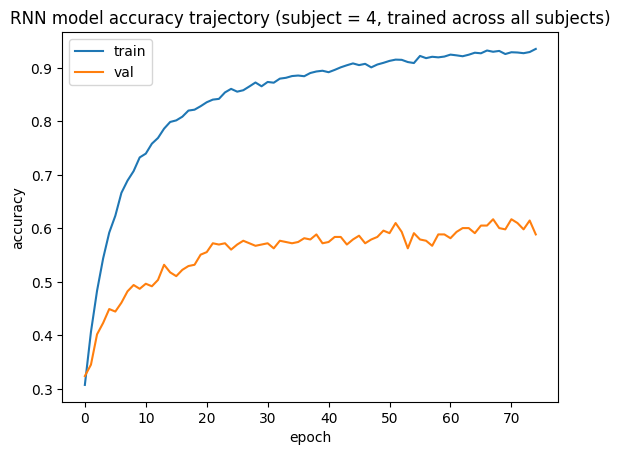

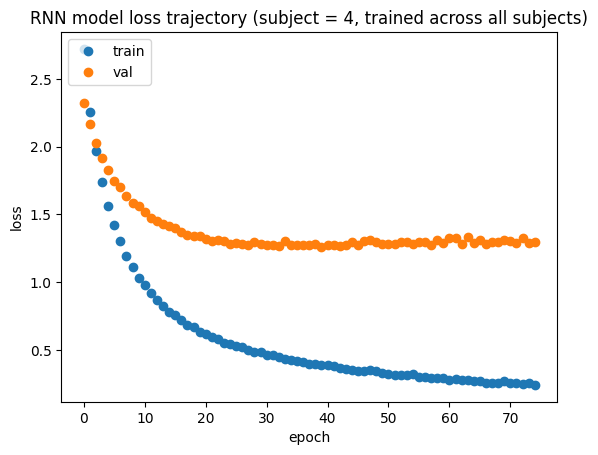

Test accuracy of the RNN model: 0.6808510422706604


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 860ms/step - accuracy: 0.2963 - loss: 3.0526 - val_accuracy: 0.3125 - val_loss: 2.5323
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.3334 - loss: 2.7350 - val_accuracy: 0.3750 - val_loss: 2.3598
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.4213 - loss: 2.4350 - val_accuracy: 0.3750 - val_loss: 2.2503
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.4594 - loss: 2.2215 - val_accuracy: 0.4167 - val_loss: 2.2462
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.5477 - loss: 1.9759 - val_accuracy: 0.3958 - val_loss: 2.2007
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - accuracy: 0.6199 - loss: 1.8046 - val_accuracy: 0.3542 - val_loss: 2.1358
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.6795 - loss: 1.6616 - val_accuracy: 0.3542 - val_loss: 2.0893
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.7170 - loss: 1.5597 - val_accuracy: 0.3958 - val_loss: 2.0591
Epo

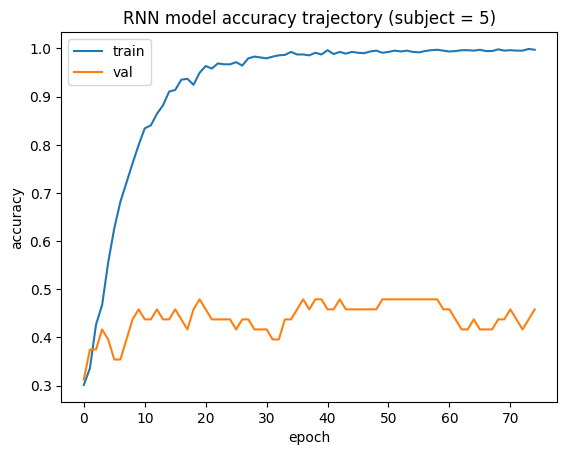

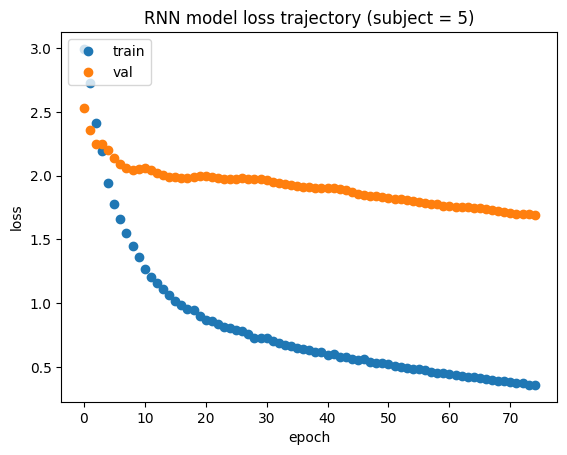

Test accuracy of the RNN model: 0.40816327929496765


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_19 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 453ms/step - accuracy: 0.2882 - loss: 2.7580 - val_accuracy: 0.3641 - val_loss: 2.2405
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.4236 - loss: 2.2175 - val_accuracy: 0.3759 - val_loss: 2.1041
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.5203 - loss: 1.8752 - val_accuracy: 0.4279 - val_loss: 1.9856
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.5743 - loss: 1.6561 - val_accuracy: 0.4350 - val_loss: 1.9013
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.6303 - loss: 1.4670 - val_accuracy: 0.4397 - val_loss: 1.8390
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.6692 - loss: 1.3403 - val_accuracy: 0.4752 - val_loss: 1.7617
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.7021 - loss: 1.2340 - val_accuracy: 0.4775 - val_loss: 1.7040
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.7280 - loss: 1.1363 - val_accuracy: 0.4681 - v

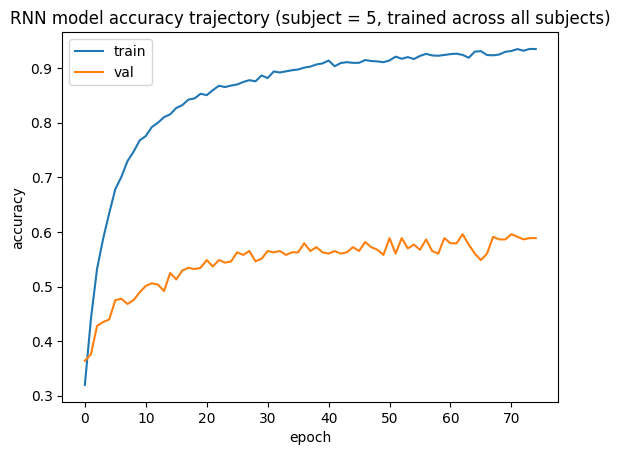

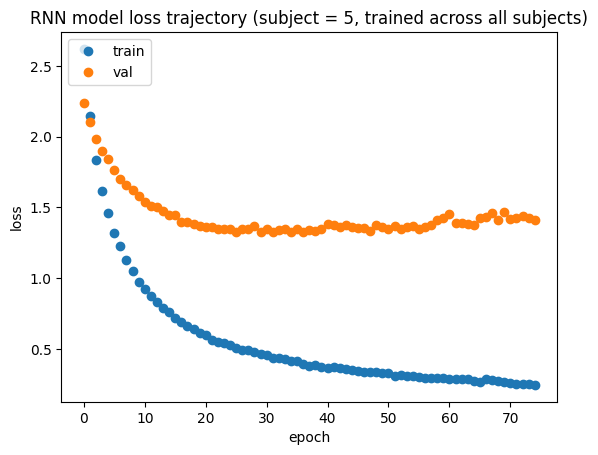

Test accuracy of the RNN model: 0.4897959232330322


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_20 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 814ms/step - accuracy: 0.2616 - loss: 2.9168 - val_accuracy: 0.2292 - val_loss: 2.6818
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3548 - loss: 2.5865 - val_accuracy: 0.3333 - val_loss: 2.4300
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.4085 - loss: 2.2879 - val_accuracy: 0.3333 - val_loss: 2.1947
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.5349 - loss: 1.9912 - val_accuracy: 0.3750 - val_loss: 2.0816
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.6133 - loss: 1.7765 - val_accuracy: 0.4167 - val_loss: 2.0011
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.7094 - loss: 1.5927 - val_accuracy: 0.4583 - val_loss: 1.9727
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 0.7368 - loss: 1.5038 - val_accuracy: 0.5208 - val_loss: 1.9532
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.7938 - loss: 1.3527 - val_accuracy: 0.5417 - val_loss: 1.9155
Ep

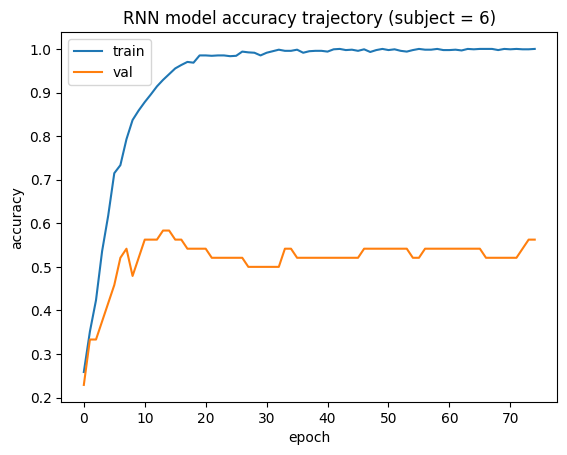

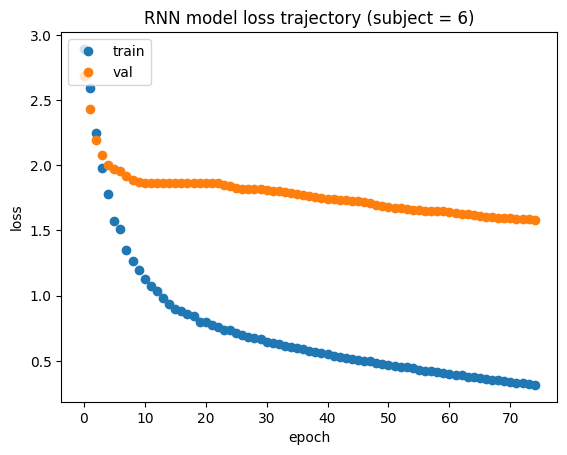

Test accuracy of the RNN model: 0.6000000238418579


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_21 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.2904 - loss: 2.7268 - val_accuracy: 0.3617 - val_loss: 2.2489
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - accuracy: 0.4243 - loss: 2.2112 - val_accuracy: 0.4019 - val_loss: 2.0936
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - accuracy: 0.5136 - loss: 1.8997 - val_accuracy: 0.4421 - val_loss: 1.9455
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.5655 - loss: 1.6783 - val_accuracy: 0.4515 - val_loss: 1.8624
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.6209 - loss: 1.4941 - val_accuracy: 0.4610 - val_loss: 1.7883
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.6598 - loss: 1.3509 - val_accuracy: 0.4657 - val_loss: 1.7340
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.6928 - loss: 1.2487 - val_accuracy: 0.4775 - val_loss: 1.6762
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.7224 - loss: 1.1373 - val_accuracy: 0.4799 - val

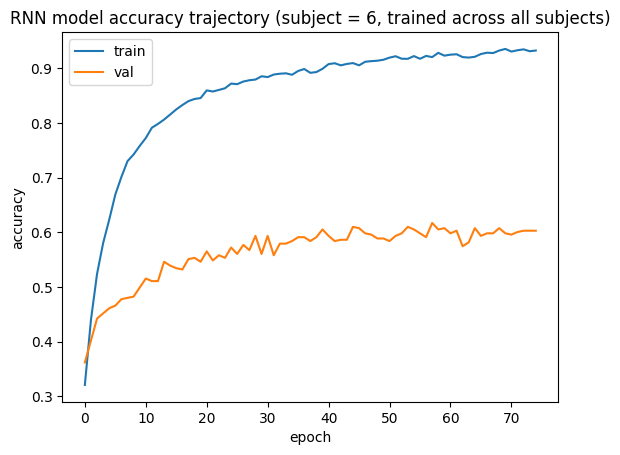

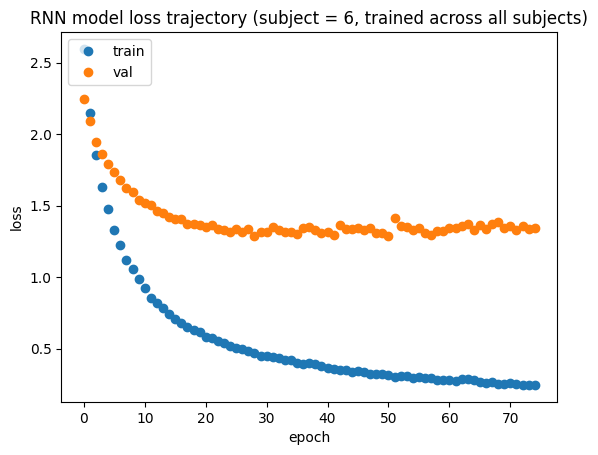

Test accuracy of the RNN model: 0.6600000262260437


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_22 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2892 - loss: 3.0296 - val_accuracy: 0.2553 - val_loss: 2.6835
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.3284 - loss: 2.7569 - val_accuracy: 0.2979 - val_loss: 2.6527
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.4126 - loss: 2.4915 - val_accuracy: 0.3191 - val_loss: 2.6647
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4762 - loss: 2.2359 - val_accuracy: 0.2979 - val_loss: 2.5307
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.5360 - loss: 2.0467 - val_accuracy: 0.2979 - val_loss: 2.4846
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.5865 - loss: 1.9179 - val_accuracy: 0.2766 - val_loss: 2.4727
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.6545 - loss: 1.7518 - val_accuracy: 0.3617 - val_loss: 2.4791
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.7246 - loss: 1.5950 - val_accuracy: 0.4043 - val_loss: 2.4670
Epoch 

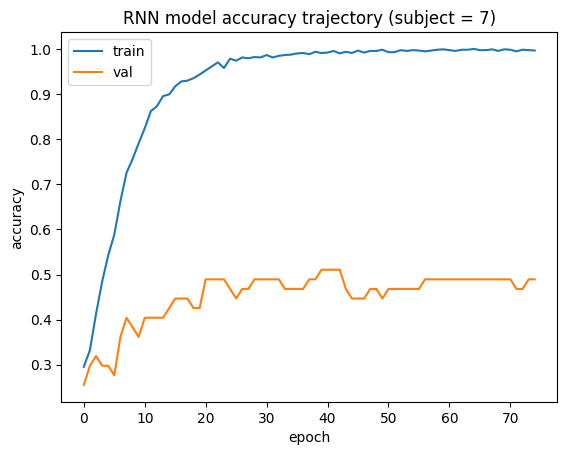

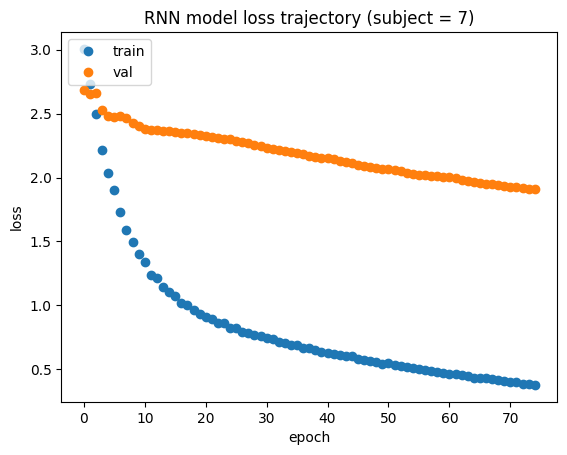

Test accuracy of the RNN model: 0.5


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_23 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - accuracy: 0.2848 - loss: 2.7759 - val_accuracy: 0.3830 - val_loss: 2.2228
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.4180 - loss: 2.2516 - val_accuracy: 0.4184 - val_loss: 2.0641
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.5011 - loss: 1.9036 - val_accuracy: 0.4681 - val_loss: 1.9428
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.5654 - loss: 1.7011 - val_accuracy: 0.4941 - val_loss: 1.8603
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.6258 - loss: 1.5234 - val_accuracy: 0.4799 - val_loss: 1.8036
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.6651 - loss: 1.3728 - val_accuracy: 0.4941 - val_loss: 1.7293
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.6886 - loss: 1.2699 - val_accuracy: 0.4965 - val_loss: 1.6917
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.7254 - loss: 1.1609 - val_accuracy: 0.5154 - v

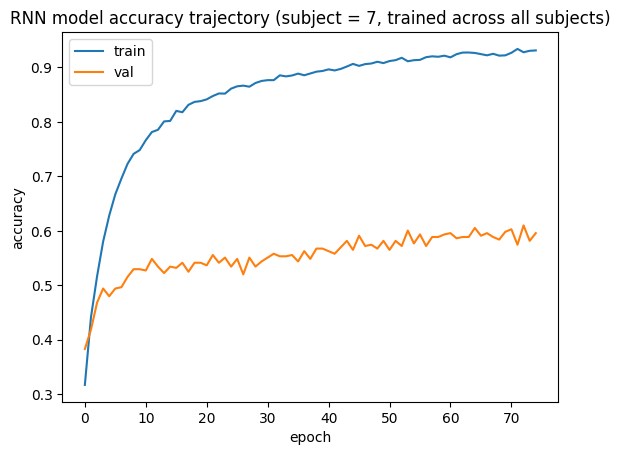

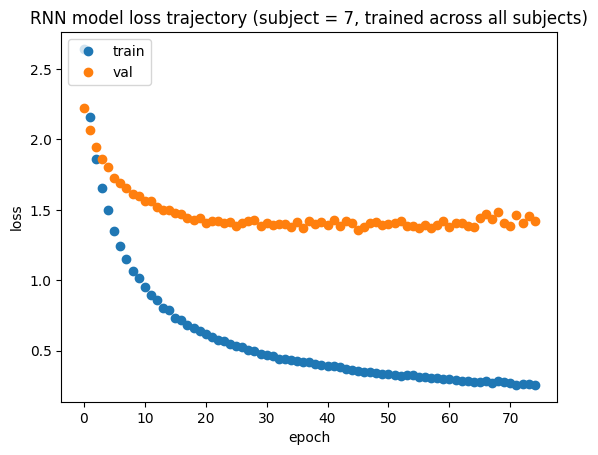

Test accuracy of the RNN model: 0.6200000047683716


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.2238 - loss: 3.0405 - val_accuracy: 0.1915 - val_loss: 2.5878
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.3701 - loss: 2.5689 - val_accuracy: 0.2766 - val_loss: 2.4249
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.4424 - loss: 2.2497 - val_accuracy: 0.3617 - val_loss: 2.3391
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5372 - loss: 1.9866 - val_accuracy: 0.3617 - val_loss: 2.2610
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6385 - loss: 1.7327 - val_accuracy: 0.4043 - val_loss: 2.2105
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6943 - loss: 1.5845 - val_accuracy: 0.4468 - val_loss: 2.1730
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7726 - loss: 1.4080 - val_accuracy: 0.4468 - val_loss: 2.1413
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8293 - loss: 1.2740 - val_accuracy: 0.4468 - val_loss: 2.1165
Epo

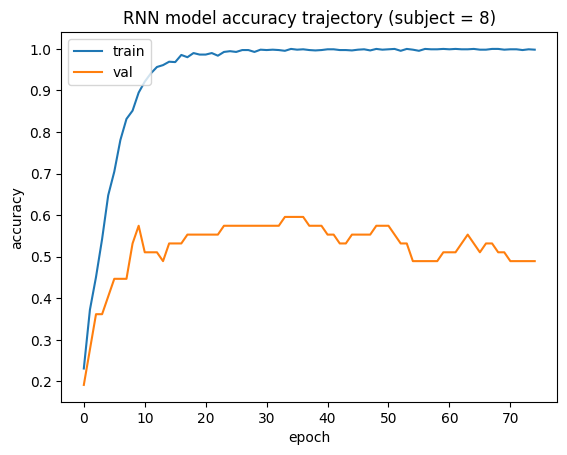

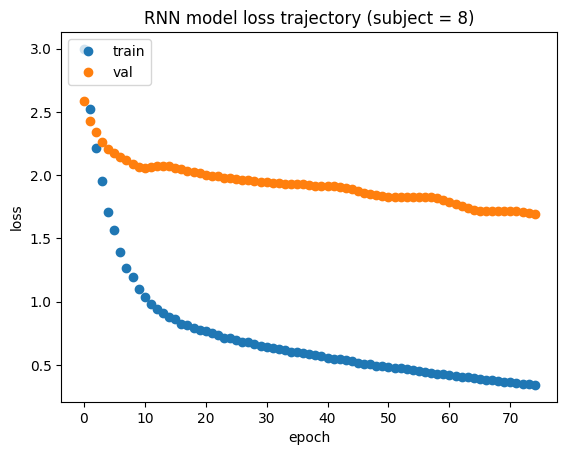

Test accuracy of the RNN model: 0.6170212626457214


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_25 (GRU)                    │ (None, 200, 16)        │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │        12,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,724 (57.52 KB)

 Trainable params: 14,724 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


/Users/wonjinlee/anaconda3/envs/ECEC147/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.2880 - loss: 2.8120 - val_accuracy: 0.3664 - val_loss: 2.3042
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.4206 - loss: 2.2506 - val_accuracy: 0.4019 - val_loss: 2.1244
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.5171 - loss: 1.9372 - val_accuracy: 0.4208 - val_loss: 1.9845
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.5765 - loss: 1.6992 - val_accuracy: 0.4563 - val_loss: 1.8767
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 0.6185 - loss: 1.5344 - val_accuracy: 0.4586 - val_loss: 1.8346
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6503 - loss: 1.4057 - val_accuracy: 0.4941 - val_loss: 1.7366
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.6921 - loss: 1.2780 - val_accuracy: 0.4917 - val_loss: 1.6691
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.7155 - loss: 1.1797 - val_accuracy: 0.4870 - val_

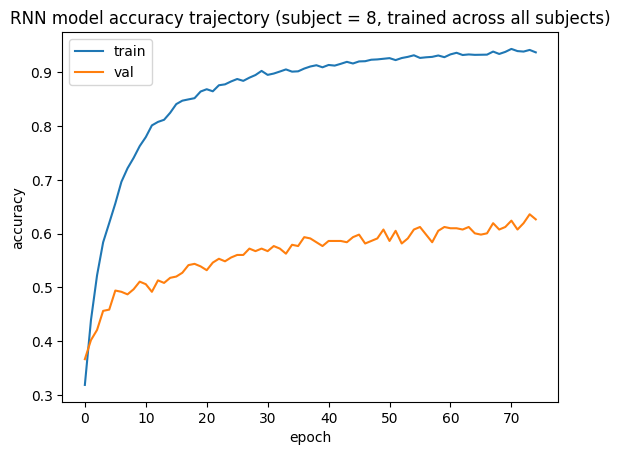

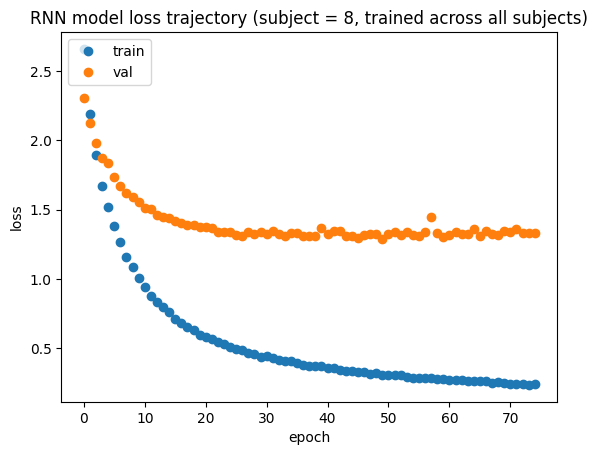

Test accuracy of the RNN model: 0.5957446694374084


In [4]:
#0 to 8 inclusive
for i in np.arange(0, 9):
    # Load original data
    X_test = np.load("data/X_test.npy")
    y_test = np.load("data/y_test.npy")
    person_train_valid = np.load("data/person_train_valid.npy")
    X_train_valid = np.load("data/X_train_valid.npy")
    y_train_valid = np.load("data/y_train_valid.npy")
    person_test = np.load("data/person_test.npy")

    # Slice data by subject
    subject_train_valid_ind = np.where(person_train_valid == i)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_train_valid'] = subject_X_train_valid
    data['y_train_valid'] = subject_y_train_valid
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    RNN = Sequential()

    RNN.add(GRU(16, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.03)))
    RNN.add(Flatten())
    RNN.add(Dropout(0.5))
    RNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    RNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    RNN.summary()


    RNN_results = RNN.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(RNN_results.history['accuracy'])
    plt.plot(RNN_results.history['val_accuracy'])
    plt.title('RNN model accuracy trajectory (subject = {})'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(RNN_results.history['loss'],'o')
    plt.plot(RNN_results.history['val_loss'],'o')
    plt.title('RNN model loss trajectory (subject = {})'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    RNN_score = RNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the RNN model:',RNN_score[1])







    ## Now train across all subjects

    # Load original data
    X_test = np.load("data/X_test.npy")
    y_test = np.load("data/y_test.npy")
    person_train_valid = np.load("data/person_train_valid.npy")
    X_train_valid = np.load("data/X_train_valid.npy")
    y_train_valid = np.load("data/y_train_valid.npy")
    person_test = np.load("data/person_test.npy")

    # Slice data by subject
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['X_train_valid'] = X_train_valid
    data['y_train_valid'] = y_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    RNN = Sequential()

    RNN.add(GRU(16, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.03)))
    RNN.add(Flatten())
    RNN.add(Dropout(0.5))
    RNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    RNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    RNN.summary()


    RNN_results = RNN.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(RNN_results.history['accuracy'])
    plt.plot(RNN_results.history['val_accuracy'])
    plt.title('RNN model accuracy trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(RNN_results.history['loss'],'o')
    plt.plot(RNN_results.history['val_loss'],'o')
    plt.title('RNN model loss trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    RNN_score = RNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the RNN model:',RNN_score[1])